Collaborators: Saif Ahmad

# ME314 Homework 1

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. Your homework will be graded IFF you submit a **single** PDF and a link to a Google colab file that meet all the requirements outlined below.

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

In [2]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
try:
    # Only works in Google Colab
    from google.colab.output._publish import javascript

    def custom_latex_printer(exp, **options):
        url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
        javascript(url=url)
        return sym.printing.latex(exp, **options)
    sym.init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)

except ModuleNotFoundError:
    # Fallback for Jupyter or other environments
    sym.init_printing(use_latex="mathjax")



```
# This is formatted as code
```

## Problem 1 (15pts)

In [4]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/2mass_spring.png' width=500' height='350'></table>"))

As shown in the image above, a block of mass $m_1$ is on one side connected to a wall by a massless spring with a spring constant $k_1$ and on another side to a block of mass $m_2$ by a massless spring with a spring constant $k_2$. Assume that the two springs have lengths of zero when "relaxed", they are stretched with any positive displacement $\Delta x > 0$, and the magnitude of the force can be computed using Hooke's law $|F| = k \Delta x$, where $k$ is the spring constant. Furthermore, there is no friction between the blocks and the ground.

Given masses $m_1=1kg$ and $ m_2=2kg$, spring constants $k_1=0.5N/m$ and $k_2=0.8N/m$, and positions of the blocks as $x_1$ and $x_2$, use Newton's law $F=ma$ to compute the accelerations of the blocks $a_1=\ddot{x}_1$ and $a_2=\ddot{x}_2$. You need to use Pythons's SymPy package to solve for symbolic solutions, as well as numerically evaluate your solutions for $a_1$ and $a_2$ as functions of $x_1$ and $x_2$ respectively. Test your numerical functions with $x_1=1m$ and $x_2=3m$ as function inputs.

*Hint 1: You will have two equations based on Newton's law $F=ma$ for each block. Thus, for each block you need to write down its $F$ in terms of $x_1$ and $x_2$ (which can be defined as symbols in SymPy).*

*Hint 2: You will need to use SymPy's **`solve()`** and **`lambdify()`** methods in this problem as seen in Homework 0. This problem is very similar to Problem 5 in Homework 0, except that (1) you need to write down the equations yourself, and (2) you don't need to solve the equations simultaneously - you can solve them one by one for each block. Feel free to take the example code in Homework 0 as a starting point.*

*Hint 3: You will need to use **`lambdify()`** to numerically evaluate a function with multiple variables. Below is an example.*

In [5]:
# Define symbols
x1, x2 = sym.symbols('x1 x2')
m1, m2 = sym.symbols('m1 m2')
k1, k2 = sym.symbols('k1 k2')
a1, a2 = sym.symbols('a1 a2')

# Equations from Newton's second law
eq1 = sym.Eq(m1*a1, -k1*x1 + k2*(x2 - x1))
eq2 = sym.Eq(m2*a2, -k2*(x2 - x1))

# Solve equations for accelerations
sol_a1 = sym.solve(eq1, a1)[0]
sol_a2 = sym.solve(eq2, a2)[0]

display(sym.Eq(a1, sol_a1))
display(sym.Eq(a2, sol_a2))

# Substitute numerical values
subs_vals = {m1: 1, m2: 2, k1: 0.5, k2: 0.8}

a1_num = sol_a1.subs(subs_vals)
a2_num = sol_a2.subs(subs_vals)

# Lambdify for numerical evaluation
a1_func = sym.lambdify((x1, x2), a1_num)
a2_func = sym.lambdify((x1, x2), a2_num)

# Test with x1 = 1, x2 = 3
print('\n\033[1mTest at x_1=1, x_2=2 : \033[0m{:.2f}'.format(a1_func(1,3)))
print('\n\033[1mTest at x_1=1, x_2=2 : \033[0m{:.2f}'.format(a2_func(1,3)))



     -k₁⋅x₁ - k₂⋅x₁ + k₂⋅x₂
a₁ = ──────────────────────
               m₁          

     k₂⋅(x₁ - x₂)
a₂ = ────────────
          m₂     


Test at x_1=1, x_2=2 : 1.10

Test at x_1=1, x_2=2 : -0.80


\**Turn in: A copy of the code used to solve for symbolic solutions and evaluate them as numerical functions, output of the code as well as the test results for numerical functions.**

## paper here

## Problem 2 (10pts)

For the same system in Problem 1, compute the Lagrangian of the system using Python's SymPy package with $x_1$, $x_2$ as system configuration variables.

*Hint 1: For an object with mass $m$ and velocity $v$, its kinetic energy is $\frac{1}{2} mv^2$.*

*Hint 2: For a spring stretched with displacement $\Delta x$ and spring ratio $k$, its potential energy is $\frac{1}{2} k (\Delta x)^2$. Also, the springs have zero mass.*

*Hint 3: Since $x_1$ and $x_2$ are actually functions of time $t$, in order to compute Euler-Lagrange equations you will need to take their derivative with respect to $t$. Instead of defining position and velocity as two separate symbols, you need to define position as SymPy's **Function** object and the velocity as the derivative of that function with respect to time $t$. An example is provided below.*

In [24]:
# Time variable
t = sp.symbols('t')
T_sym, V_sym , L_sym = sym.symbols('T V L')

# Generalized coordinates as functions of time
x1 = sp.Function('x1')(t)
x2 = sp.Function('x2')(t)

# Velocities
x1_dot = sp.diff(x1, t)
x2_dot = sp.diff(x2, t)

# Kinetic energy
T = sp.Rational(1,2)*m1*x1_dot**2 + sp.Rational(1,2)*m2*x2_dot**2

# Potential energy
V = sp.Rational(1,2)*k1*x1**2 + sp.Rational(1,2)*k2*(x2 - x1)**2

# Lagrangian
L = T - V

display(sym.Eq(T_sym, T))
display(sym.Eq(V_sym, V))
display(sym.Eq(L_sym, L))


                  2                 2
       ⎛d        ⎞       ⎛d        ⎞ 
    m₁⋅⎜──(x₁(t))⎟    m₂⋅⎜──(x₂(t))⎟ 
       ⎝dt       ⎠       ⎝dt       ⎠ 
T = ─────────────── + ───────────────
           2                 2       

         2                         2
    k₁⋅x₁ (t)   k₂⋅(-x₁(t) + x₂(t)) 
V = ───────── + ────────────────────
        2                2          

                                                       2                 2
                                            ⎛d        ⎞       ⎛d        ⎞ 
           2                         2   m₁⋅⎜──(x₁(t))⎟    m₂⋅⎜──(x₂(t))⎟ 
      k₁⋅x₁ (t)   k₂⋅(-x₁(t) + x₂(t))       ⎝dt       ⎠       ⎝dt       ⎠ 
L = - ───────── - ──────────────────── + ─────────────── + ───────────────
          2                2                    2                 2       

## Problem 3 (10pts)

Based on your solution for Problem 2, compute the Euler-Lagrange equations for this system.

*Hint 1: In this problem, the system has two configuration variables. Thus, when taking the derivative of the Lagrangian with respect to the system state vector, the derivative is also a vector (sometimes also called the Jacobian of the Lagrangian with respect to system states). Below is an example of several ways to compute the derivative with respect to a vector in SymPy.*

In [25]:
# Euler-Lagrange for x1
dLd_x1_dot = sp.diff(L, x1_dot)
d_dt__dLd_x1_dot = sp.diff(dLd_x1_dot, t)
dLd_x1 = sp.diff(L, x1)
EL1 = sp.simplify(d_dt__dLd_x1_dot - dLd_x1)

# Euler-Lagrange for x2
dLd_x2_dot = sp.diff(L, x2_dot)
d_dt__dLd_x2_dot = sp.diff(dLd_x2_dot, t)
dLd_x2 = sp.diff(L, x2)
EL2 = sp.simplify(d_dt__dLd_x2_dot - dLd_x2)

el_eqns = [EL1, EL2]

display(el_eqns)

⎡                                    2                                    2    ↪
⎢                                   d                                    d     ↪
⎢k₁⋅x₁(t) + k₂⋅(x₁(t) - x₂(t)) + m₁⋅───(x₁(t)), -k₂⋅(x₁(t) - x₂(t)) + m₂⋅───(x ↪
⎢                                     2                                    2   ↪
⎣                                   dt                                   dt    ↪

↪      ⎤
↪      ⎥
↪ ₂(t))⎥
↪      ⎥
↪      ⎦

## Problem 4 (15pts)

Based on your Euler-Lagrange equations from Problem 3, use Python's SymPy package to solve the equations for the accelerations of the two blocks $\ddot{x}_1, \ddot{x}_2$, in terms of position $x_1, x_2$, and velocity $\dot{x}_1, \dot{x}_2$. Compare your answer to Problem 1 to see if they match with each other and comment if this is not the case.

*Hint 1: Since you need to solve a set of multiple equations symbolically in SymPy, it's recommended to wrap both sides of the equations into SymPy's Matrix object. As an example, below is the code solving the following set of equations (feel free to use this code as a starting point).*
$$
\begin{aligned}
\left\{
    \begin{array}{ll}
      x^2 + y = 3 \\
      x + y = 1
    \end{array}
\right.
\end{aligned}
$$

In [40]:
# Accelerations (actually we want to solve for these)
xdd1 = sp.Symbol('xdd1')
xdd2 = sp.Symbol('xdd2')

# Equations (from Problem 3)
eq1 = sp.Eq(m1*xdd1 + k1*x1 + k2*(x1 - x2), 0)
eq2 = sp.Eq(m2*xdd2 - k2*(x1 - x2), 0)

# Solve simultaneously for accelerations
solutions = sp.solve([eq1, eq2], [xdd1, xdd2])

# Matrix to display sln
el_eqns = [el_eqns[0], el_eqns[1]]
rhs = sym.Matrix([0, 0])
eqn = sym.Eq(solutions, rhs)
display(eqn)

display(sym.Eq(xdd1, solutions[xdd1]))
display(sym.Eq(xdd2, solutions[xdd2]))


⎧        k₁⋅x₁(t)   k₂⋅x₁(t)   k₂⋅x₂(t)        k₂⋅x₁(t)   k₂⋅x₂(t)⎫   ⎡0⎤
⎨xdd₁: - ──────── - ──────── + ────────, xdd₂: ──────── - ────────⎬ = ⎢ ⎥
⎩           m₁         m₁         m₁              m₂         m₂   ⎭   ⎣0⎦

         k₁⋅x₁(t)   k₂⋅x₁(t)   k₂⋅x₂(t)
xdd₁ = - ──────── - ──────── + ────────
            m₁         m₁         m₁   

       k₂⋅x₁(t)   k₂⋅x₂(t)
xdd₂ = ──────── - ────────
          m₂         m₂   

## Problem 5 (10pts)


In [9]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://raw.githubusercontent.com/MuchenSun/ME314pngs/master/dyninvpend.png' width=500' height='350'></table>"))


You are given the unforced inverted cart-pendulum as shown below. The pendulum is in gravity and can swing freely (the cart will not interfere with pendulum's motion). The cart can move freely in the horizontal direction. Take $x$ and $\theta$ as the system configuration variables and compute the Lagrangian of the system using Python's SymPy package. Provide symoblic solution of the Lagrangian with $m$, $R$, and $M$ as symbols instead of given constants.

*Hint 1: Assume that the positive direction for the rotation of the pendulum $\dot{\theta}$ is clockwise. Likewise, the positive direction for the translation of the cart is to the right.*

*Hint 2: You will need to define $m$, $R$, and $M$ as SymPy's symbols.*

*Hint 3: Note that the pendulum is attached to the cart! In order to compute the kinetic energy of the pendulum, the velocity of the cart needs to be considered. One suggestion is to compute the velocity of the pendulum in a different coordinate system (other than Cartesian with $x$ and $y$ coordinates).*

In [45]:
# Symbols
M, m, R, g = sp.symbols('M m R g', real=True, positive=True)
x, theta = sp.symbols('x theta', real=True)
xdot, thetadot = sp.symbols('xdot thetadot', real=True)
T_sym, V_sym , L_sym = sym.symbols('T V L')

# Kinetic energy
T_cart = 0.5 * M * xdot**2
T_pend = 0.5 * m * ((xdot + R*sp.cos(theta)*thetadot)**2 + (R*sp.sin(theta)*thetadot)**2)
T = T_cart + T_pend

# Potential energy
V = -m*g*R*sp.cos(theta)

# Lagrangian
L = sp.simplify(T - V)

display(sym.Eq(T_sym, T))
display(sym.Eq(V_sym, V))
display(sym.Eq(L_sym, L))

           2         ⎛ 2  2    2                      2⎞
T = 0.5⋅M⋅ẋ  + 0.5⋅m⋅⎝R ⋅θ̇ ⋅sin (θ) + (R⋅θ̇⋅cos(θ) + ẋ) ⎠

V = -R⋅g⋅m⋅cos(θ)

           2                        ⎛ 2  2                     2⎞
L = 0.5⋅M⋅ẋ  + R⋅g⋅m⋅cos(θ) + 0.5⋅m⋅⎝R ⋅θ̇  + 2⋅R⋅θ̇⋅ẋ⋅cos(θ) + ẋ ⎠

## Problem 6 (15pts)

Based on your solution in Problem 5, compute the Euler-Lagrange equations for this inverted cart-pendulun system using Python's SymPy package.

**Turn in: A copy of the code used to symbolically compute Euler-Lagrange equations  and the code output (i.e. the computed expression of the Lagrangian).**

In [52]:
# Time variable
t = sp.symbols('t')

# Generalized coordinates as functions of time
x = sp.Function('x')(t)
theta = sp.Function(r'\theta')(t)

# Velocities
x_dot = sp.diff(x, t)
theta_dot = sp.diff(theta, t)

# Kinetic energy
T_cart = sp.Rational(1,2) * M * x_dot**2
T_pend = sp.Rational(1,2) * m * ((x_dot + R*sp.cos(theta)*theta_dot)**2 + (R*sp.sin(theta)*theta_dot)**2)
T = T_cart + T_pend

# Potential energy
V = m*g*R*sp.cos(theta)

# Lagrangian
L = T - V

# Euler-Lagrange for x1
dLd_x1dot = sp.diff(L, x_dot)
d_dt__dLd_x1dot = sp.diff(dLd_x1dot, t)
dLd_x1 = sp.diff(L, x1)
EL1 = sp.simplify(d_dt__dLd_x1dot - dLd_x1)

# Euler-Lagrange for x2
dLd_theta_dot = sp.diff(L, theta_dot)
d_dt__dLd_theta_dot = sp.diff(dLd_theta_dot, t)
dLd_x2 = sp.diff(L, theta)
EL2 = sp.simplify(d_dt__dLd_theta_dot - dLd_x2)

el_eqns = [EL1, EL2]

display(el_eqns)

⎡   2            ⎛                                  2                     2    ↪
⎢  d             ⎜                   ⎛d            ⎞                     d     ↪
⎢M⋅───(x(t)) + m⋅⎜- R⋅sin(\theta(t))⋅⎜──(\theta(t))⎟  + R⋅cos(\theta(t))⋅───(\ ↪
⎢    2           ⎜                   ⎝dt           ⎠                       2   ↪
⎣  dt            ⎝                                                       dt    ↪

↪              2       ⎞      ⎛   2                                            ↪
↪             d        ⎟      ⎜  d                                             ↪
↪ theta(t)) + ───(x(t))⎟, R⋅m⋅⎜R⋅───(\theta(t)) - g⋅sin(\theta(t)) + cos(\thet ↪
↪               2      ⎟      ⎜    2                                           ↪
↪             dt       ⎠      ⎝  dt                                            ↪

↪        2       ⎞⎤
↪       d        ⎟⎥
↪ a(t))⋅───(x(t))⎟⎥
↪         2      ⎟⎥
↪       dt       ⎠⎦

## Problem 7 (15pts)

Find symbolic expressions of $\ddot{x}$ and $\ddot{\theta}$ from the Euler-Lagrange equations in Problem 6 using SymPy's **`solve()`** method (NOTE: the expressions should be in terms of $x$, $\theta$, $\dot{x}$ and $\dot{\theta}$ only). Convert these results to numerical functions using SymPy's **`lambdify()`** method by substituting $M, m, R, g$ symbols with $M=2, m=1, R=1, g=9.8$ values. Test your numerical functions of $\ddot{x}$ and $\ddot{\theta}$ by evaluating them given $x=0, \theta=0.1, \dot{x}=0, \dot{\theta}=0$ as function inputs.

**Turn in: A copy of the code used to symbolically solve and numerically evaluate the solutions of Euler-Lagrange equations (i.e. $\ddot{x}$ and $\ddot{\theta}$). Include the code output, consisting of symbolic expression of $\ddot{x}$ and $\ddot{\theta}$, as well as your test results for the numerical evaluations.**

In [50]:
xdd = sp.diff(x, (t,2))
thdd = sp.diff(theta, (t,2))

sol = sp.solve([EL1, EL2], [xdd, thdd], dict=True)[0]
xdd_expr = sp.simplify(sol[xdd])
thdd_expr = sp.simplify(sol[thdd])

#display(xdd_expr)
#display(thdd_expr)

# Substitute numerical values
subs_vals = {M: 2, m: 1, R: 1, g: 9.8}
sol_x_acc_subs = sol[xdd].subs(subs_vals)
sol_theta_acc_subs = sol[thdd].subs(subs_vals)

# Lambdify for numerical evaluation
sol_x_func = sym.lambdify([x, x_dot, theta, theta_dot], sol_x_acc_subs)
sol_theta_func = sym.lambdify([x, x_dot, theta, theta_dot], sol_theta_acc_subs)

display(sol_x_acc_subs)
display(sol_theta_acc_subs)

#sol_x_func = sym.lambdify([x,xdot,theta,thetadot],sol_x_acc_subs)
print('\n\033[ x accealaration at x=0,  xdot=0, theta=0.1,thetadot = 0 : \033[0m{:.4f}'.format(sol_x_func(0, 0, 0.1,0)))
#theta_acc_func = sym.lambdify([x,xdot,theta,thetadot],sol_theta_acc_subs)
print('\n\033[ theta accealaration at x=0,  xdot=0, theta=0.1, thetadot = 0 : \033[0m{:.4f}'.format(sol_theta_func(0, 0, 0.1,0)))

#display(sym.Eq(xdd_expr, thdd_expr))
#display(sym.Eq(xdd_expr, thdd_expr))

                                                                  2
                                                   ⎛d            ⎞ 
                                    sin(\theta(t))⋅⎜──(\theta(t))⎟ 
9.8⋅sin(\theta(t))⋅cos(\theta(t))                  ⎝dt           ⎠ 
───────────────────────────────── - ───────────────────────────────
          2                                  2                     
       cos (\theta(t)) - 3                cos (\theta(t)) - 3      

                                             2                      
                              ⎛d            ⎞                       
sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\theta(t))⎟                       
                              ⎝dt           ⎠    29.4⋅sin(\theta(t))
────────────────────────────────────────────── - ───────────────────
                2                                   2               
             cos (\theta(t)) - 3                 cos (\theta(t)) - 3


[ x accealaration at x=0,  xdot=0, theta=0.1,thetadot = 0 : -0.4843

[ theta accealaration at x=0,  xdot=0, theta=0.1, thetadot = 0 : 1.4603


## Problem 8 (10pts)

Based on your symbolic and numerical solutions for $\ddot{x}(t)$ and $\ddot{\theta}(t)$, which are now functions of $x(t), \theta(t), \dot{x}(t)$ and $\dot{\theta}(t)$, simulate the system for $t\in[0,10]$, with initial conditions $x(0)=0, \theta(0)=0.1, \dot{x}(0)=0, \dot{\theta}(0)=0$ and the numerical integration and simulation functions provided below. Plot the trajectories of $x(t)$ and $\theta(t)$ versus time.

*Hint 1: The numerical simulation function below can only simulate systems with first-order dynamics. This means that the function of dynamics (i.e. $f(xt)$), whose input is fed to the numerical integration and simulation functions, needs to return the first-order time derivative. This might be confusing because our solutions $\ddot{x}(t)$ and $\ddot{\theta}(t)$ are second-order time derivative. The trick here is to extend the system state from $[x(t), \theta(t)]$ to $[x(t), \theta(t), \dot{x}(t), \dot{\theta}(t)]$, thus the time derivative of the state vector becomes $[\dot{x}(t), \dot{\theta}(t), \ddot{x}(t), \ddot{\theta}(t)]$. Now, when you write down the system dynamics function, the third and forth elements of input vector $\dot{x}(t)$ and $\dot{\theta}(t)$ can be put into the output vector directly, and we already know the rest two elements of the output vector, from our previous solution of Euler-Lagrange equations. More information can be found in Lecture Note 1 (Background) - Section 1.4 Ordinary Differential Equations. An example is provided below for simulating a particle falling in gravity, where the acceleration $\ddot{x}(t) = -9.8$.*

*Hint 2: You will need to include the numerical evaluations for $\ddot{x}(t)$ and $\ddot{\theta}(t)$ in system dynamics function. You can either use your previous **`lambdify()`** results, or hand code the equations from previous symbolic solutions. We recommend using **`lambdify()`** for practice because later homeworks will require integration of much more complicated equations.*

**Turn in: A copy of the code used to simulate the system with the plot of the simulated trajectories.**

In [13]:

def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj, tvec

##############################################
# example: simulate a particle falling in gravity
def x_acc(x, xdot, theta, thetadot):
    X_acc = sol_x_func(x, xdot, theta, thetadot)
    return X_acc

def theta_acc(x, xdot, theta, thetadot):
    Theta_acc = sol_theta_func(x, xdot, theta, thetadot)
    return Theta_acc

def dyn(s):
  x, xdot,theta,thetadot = s

  return np.array([
        xdot,
        x_acc(x, xdot, theta, thetadot),
        thetadot,
        theta_acc(x, xdot, theta, thetadot)
    ])

# define initial state
s0 = np.array([0.0, 0.0, 0.1, 0.0]) # at 10m high with zero velocity
# simulat from t=0 to 10, since dt=0.1, the returned trajectory
# will have 10/0.1=100 time steps, each time step contains extended
# system state vector [x(t), xdot(t)]
traj, tvec = simulate(dyn, s0, [0, 10], 0.1, integrate)
print('\033[1mShape of traj: \033[0m', traj.shape)



Shape of traj:  (4, 100)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_36920/2297827950.py:2: SyntaxWarning: invalid escape sequence '\d'
  """
/tmp/ipykernel_36920/2297827950.py:31: SyntaxWarning: invalid escape sequence '\d'
  """


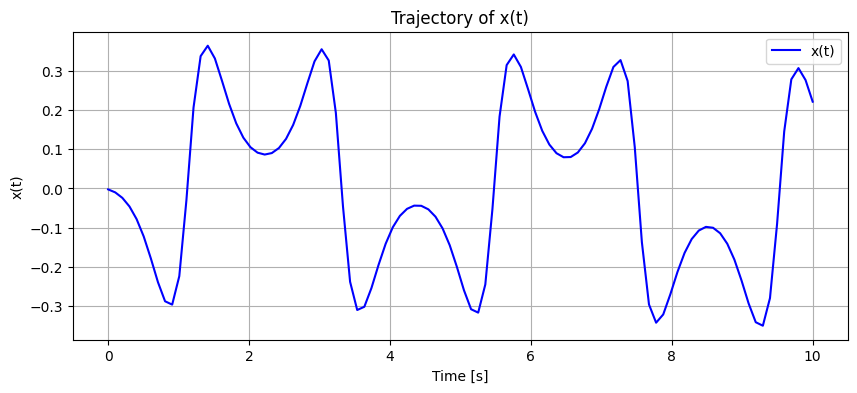

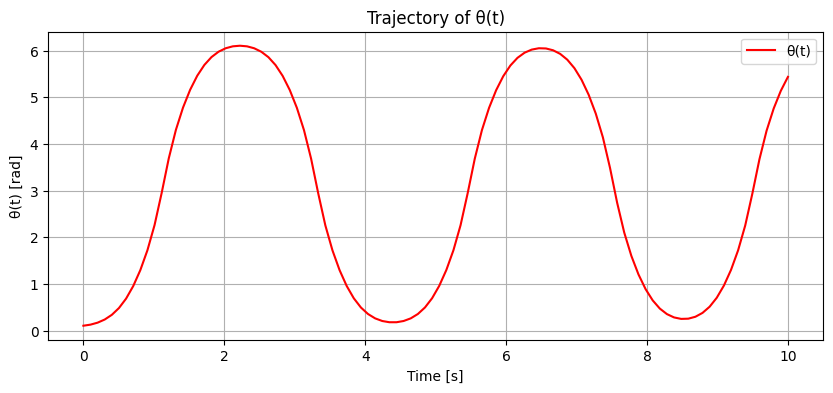

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,4))
plt.plot(tvec, traj[0,:], label="x(t)", color="blue")
plt.xlabel("Time [s]")
plt.ylabel("x(t)")
plt.title("Trajectory of x(t)")
plt.grid(True)
plt.legend()
plt.show()

# Plot theta(t)
plt.figure(figsize=(10,4))
plt.plot(tvec, traj[2,:], label="θ(t)", color="red")
plt.xlabel("Time [s]")
plt.ylabel("θ(t) [rad]")
plt.title("Trajectory of θ(t)")
plt.grid(True)
plt.legend()
plt.show()